In [1]:
import pandas as pd
import os, time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from epftoolbox.evaluation import MAE, MAPE, RMSE, rMAE
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [2]:
os.chdir('..')
tf.random.set_seed(123)

In [3]:
# Funciones auxiliares
# Romper el dataset
def train_test_vali(serie, train_size, valida_size, ts_size):
    total_data = serie.shape[0]

    train_data = int(total_data * train_size)
    valid_data = int(total_data * valida_size)
    test_data = total_data - train_data - valid_data

    train = serie[0:train_data]
    vali = serie[train_data:train_data + valid_data]
    test = serie[train_data + valid_data:]
    return train, vali, test

#Crear dataset supervisado
def to_sequences(SEQUENCE_SIZE, obs):
    x = []
    y = []

    for i in range(len(obs)-SEQUENCE_SIZE):
        window = obs[i:(i+SEQUENCE_SIZE)]
        after_window = obs[i+SEQUENCE_SIZE]
        window = [[x] for x in window]
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)

# Auxiliares del modelo
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred-y_true)))
    return rmse

# Función para medir el tiempo de ejecución
def elapsed_time(start_time):
    return time.time() - start_time

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

Epoch 1/50
543/543 [==============================] - 24s 40ms/step - loss: 0.0090 - val_loss: 0.0081
Epoch 2/50
543/543 [==============================] - 19s 35ms/step - loss: 0.0082 - val_loss: 0.0077
Epoch 3/50
543/543 [==============================] - 18s 33ms/step - loss: 0.0078 - val_loss: 0.0077
Epoch 4/50
543/543 [==============================] - 28s 51ms/step - loss: 0.0076 - val_loss: 0.0073
Epoch 5/50
543/543 [==============================] - 18s 34ms/step - loss: 0.0074 - val_loss: 0.0072
Epoch 6/50
543/543 [==============================] - 18s 33ms/step - loss: 0.0073 - val_loss: 0.0071
Epoch 7/50
543/543 [==============================] - 18s 33ms/step - loss: 0.0072 - val_loss: 0.0071
Epoch 8/50
543/543 [==============================] - 18s 33ms/step - loss: 0.0071 - val_loss: 0.0069
Epoch 9/50
543/543 [==============================] - 18s 33ms/step - loss: 0.0070 - val_loss: 0.0069
Epoch 10/50
543/543 [==============================] - 18s 33ms/step - loss: 0.006

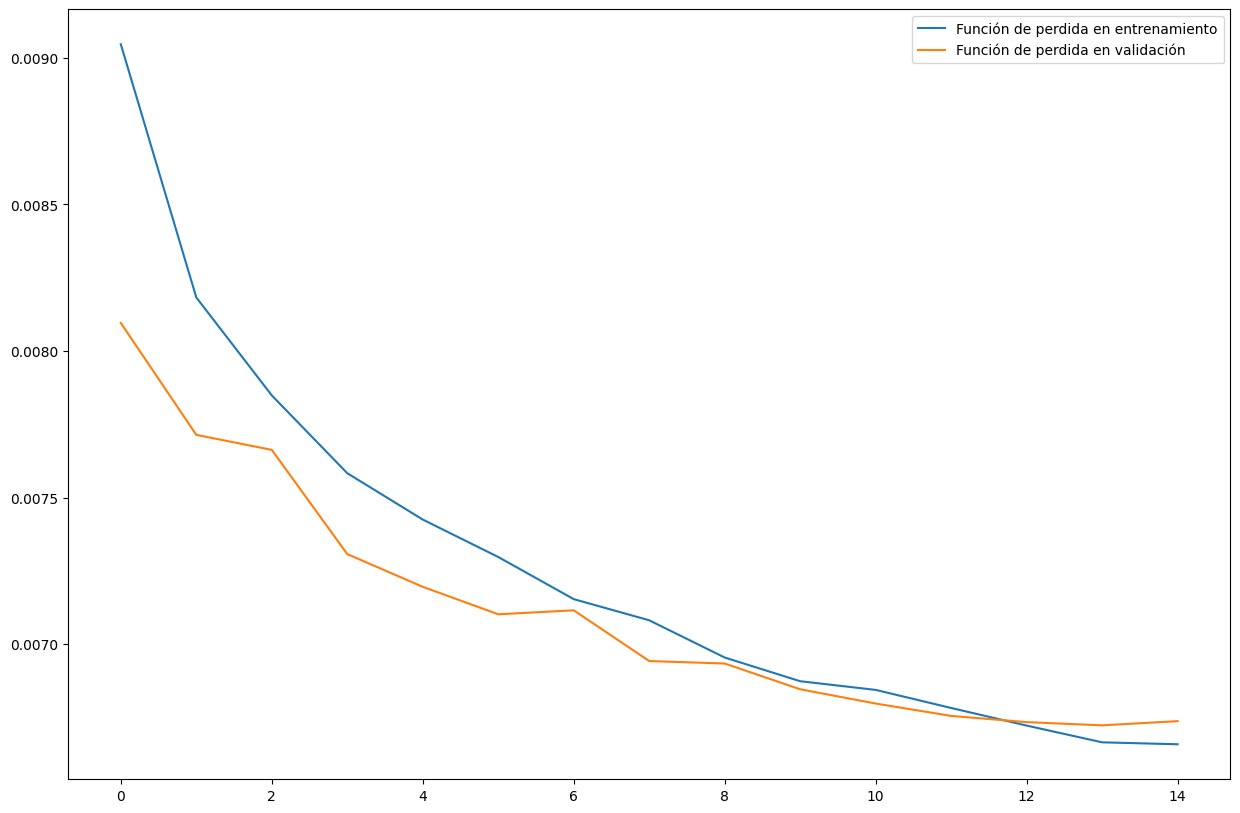

620/620 [==============================] - 2s 3ms/step


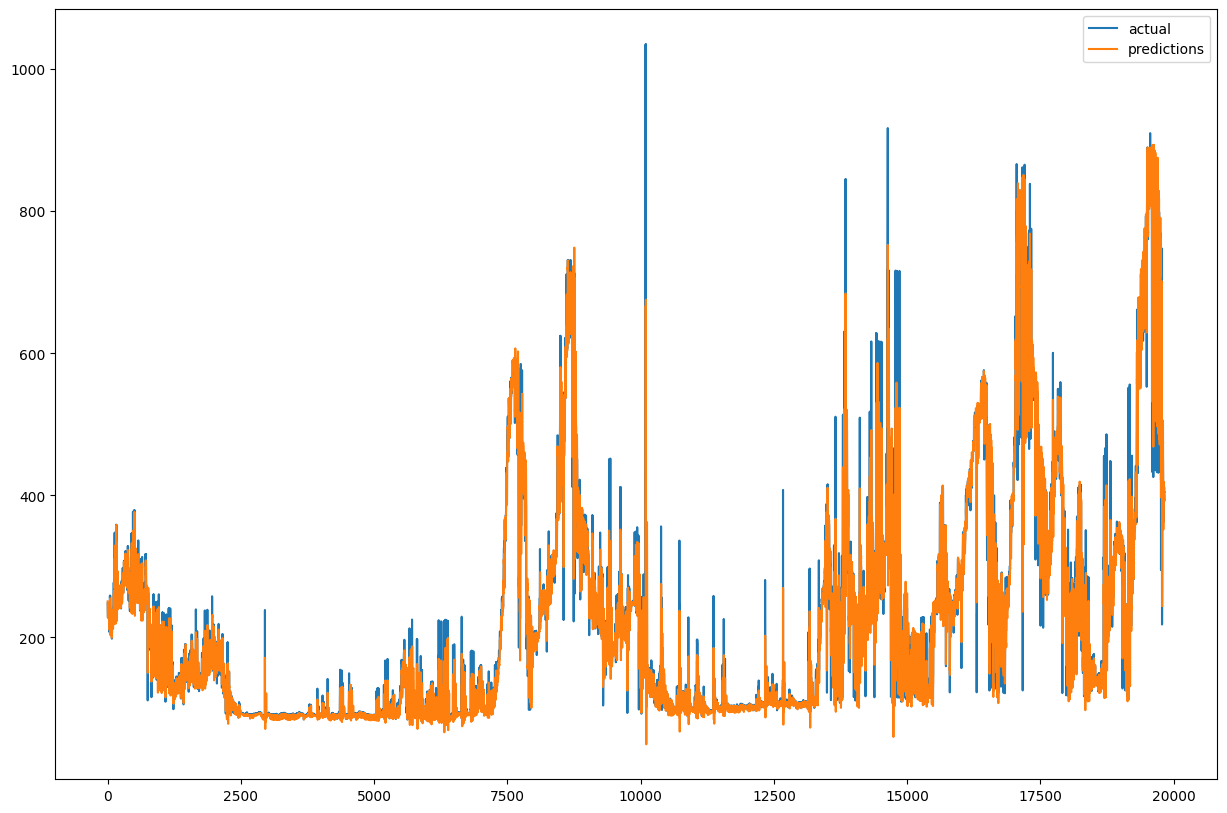

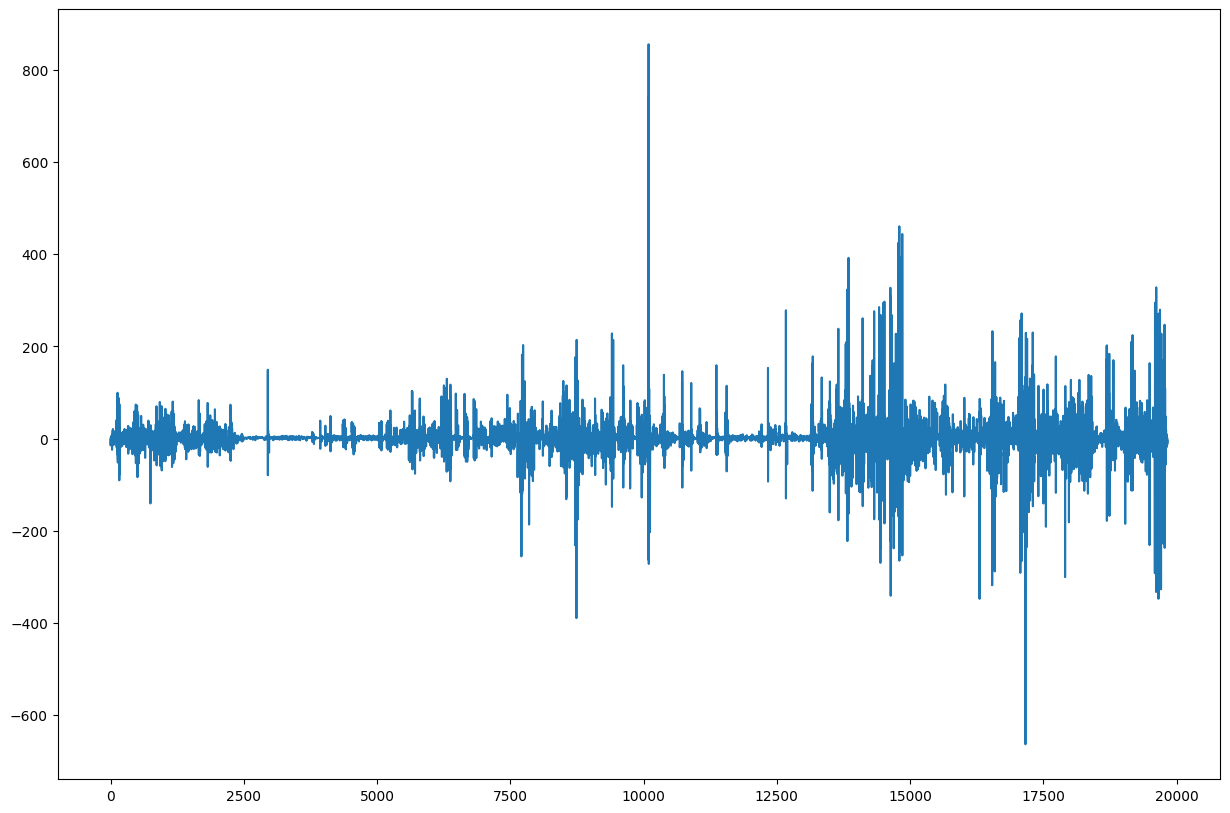

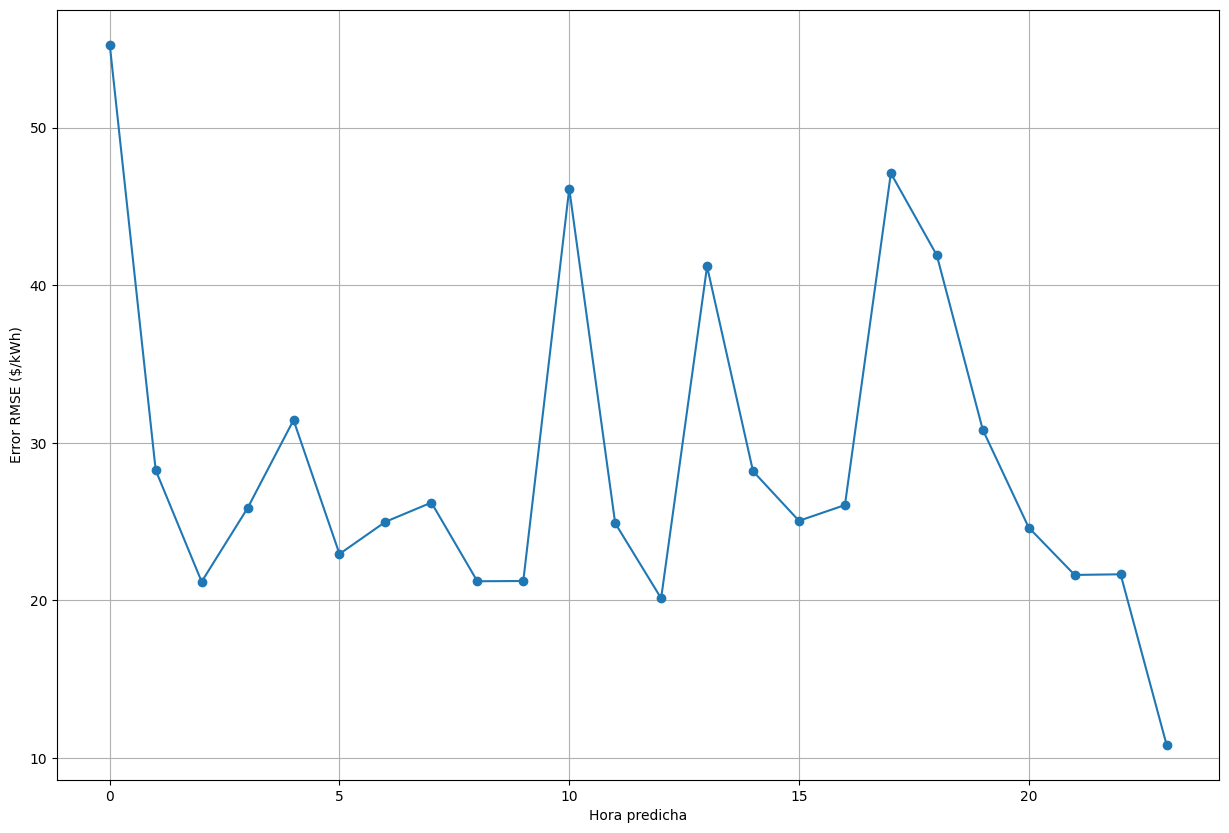

Epoch 1/50
621/621 [==============================] - 18s 25ms/step - loss: 0.0149 - val_loss: 0.0114
Epoch 2/50
621/621 [==============================] - 15s 24ms/step - loss: 0.0084 - val_loss: 0.0103
Epoch 3/50
621/621 [==============================] - 15s 24ms/step - loss: 0.0078 - val_loss: 0.0097
Epoch 4/50
621/621 [==============================] - 15s 25ms/step - loss: 0.0075 - val_loss: 0.0094
Epoch 5/50
621/621 [==============================] - 16s 25ms/step - loss: 0.0074 - val_loss: 0.0093
Epoch 6/50
621/621 [==============================] - 15s 25ms/step - loss: 0.0072 - val_loss: 0.0091
Epoch 7/50
621/621 [==============================] - 22s 35ms/step - loss: 0.0071 - val_loss: 0.0092
Epoch 8/50
621/621 [==============================] - 19s 30ms/step - loss: 0.0070 - val_loss: 0.0092
Epoch 9/50
621/621 [==============================] - 27s 43ms/step - loss: 0.0069 - val_loss: 0.0089
Epoch 10/50
621/621 [==============================] - 20s 33ms/step - loss: 0.006

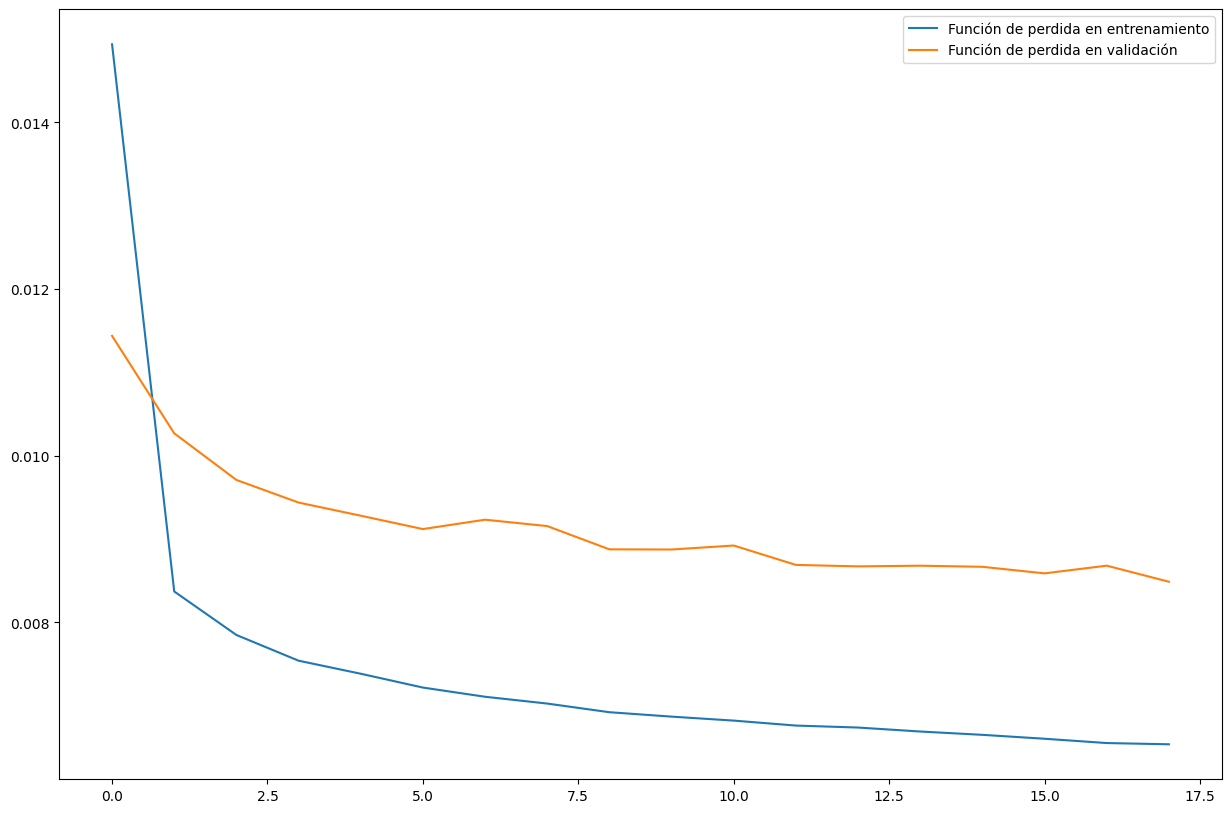

620/620 [==============================] - 2s 3ms/step


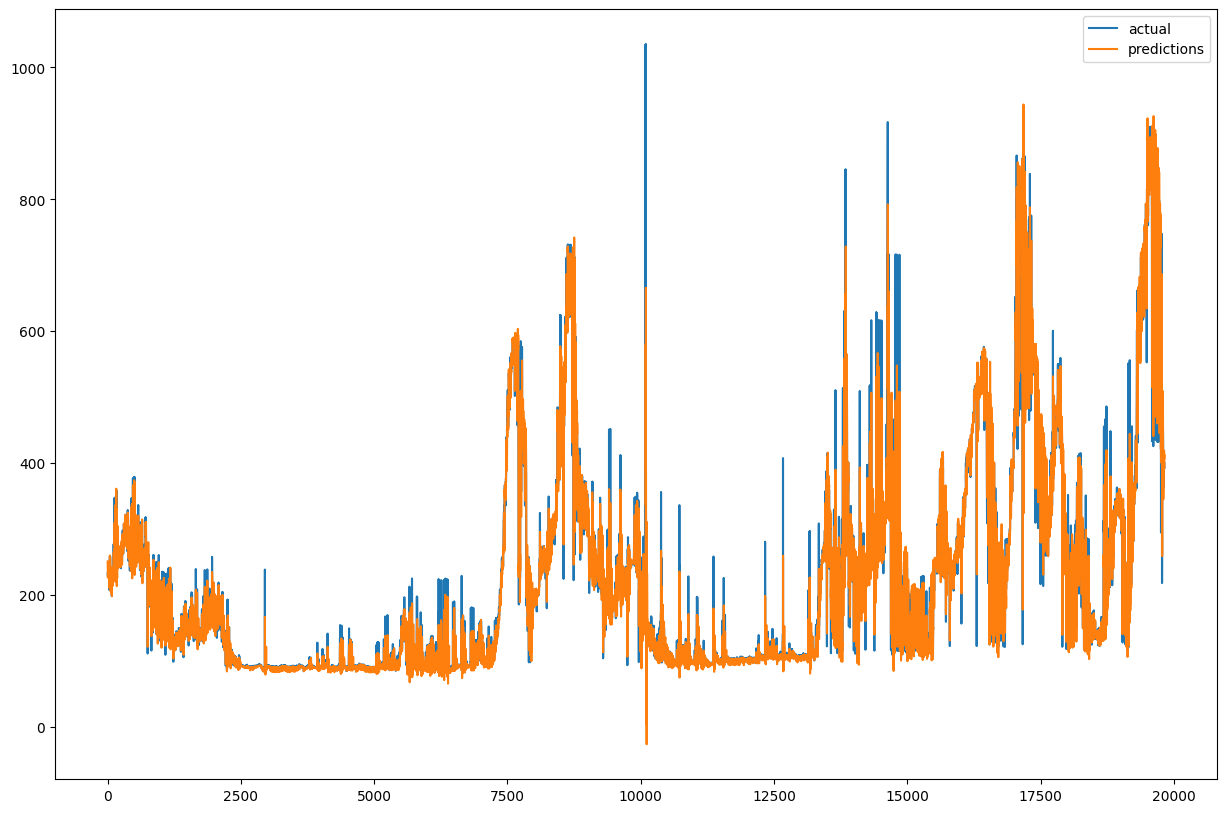

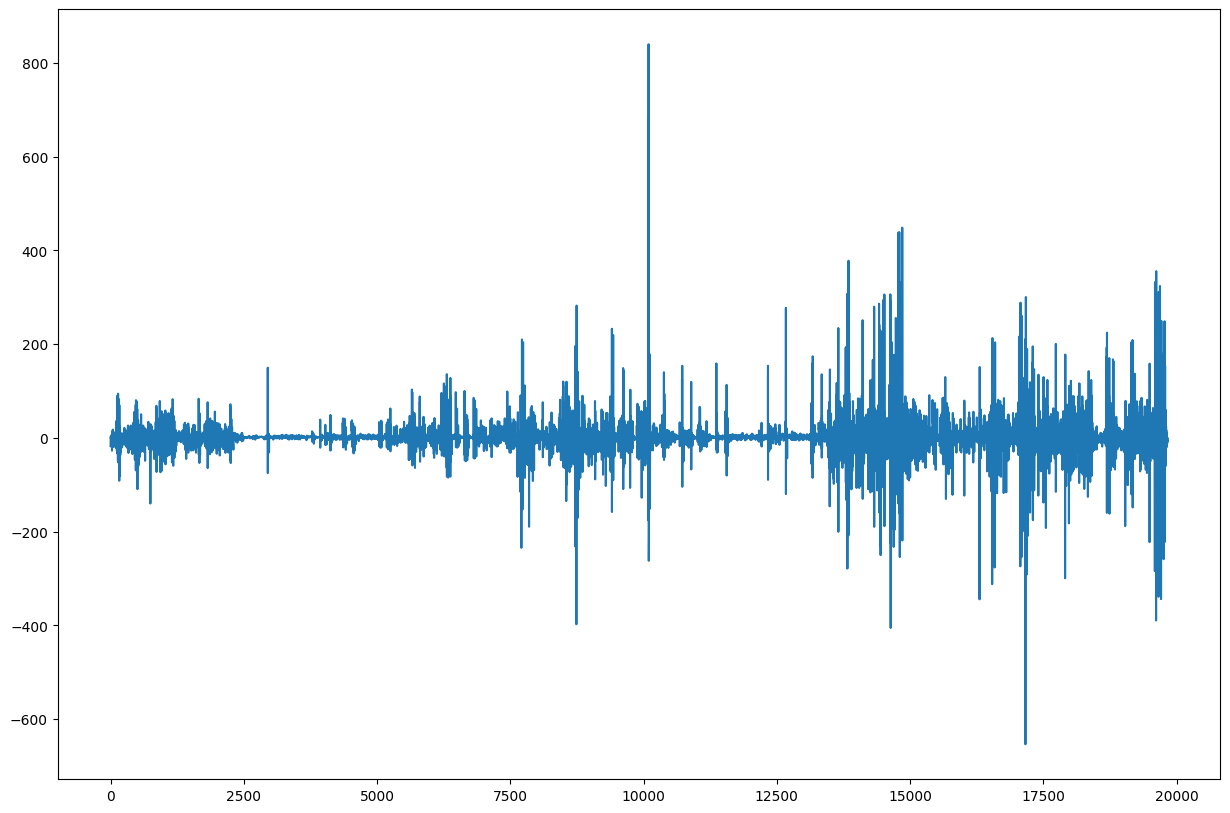

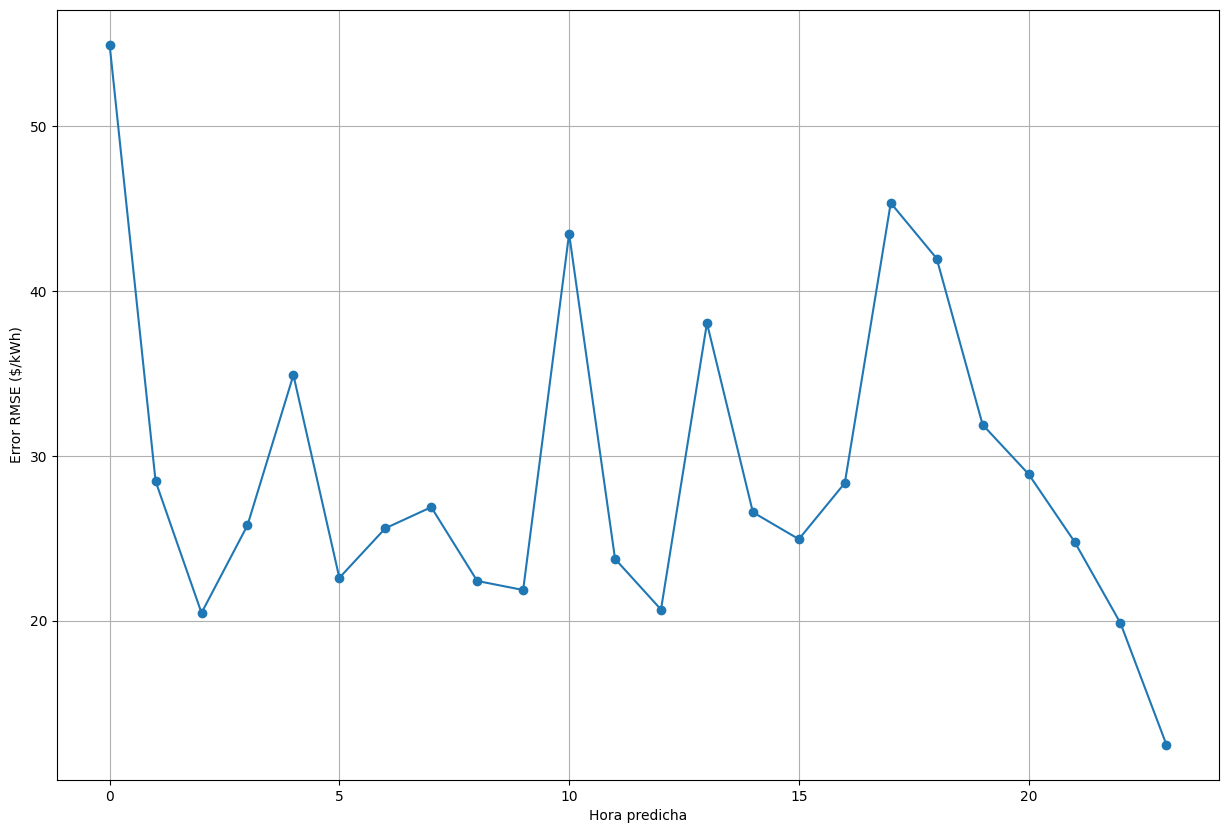

Epoch 1/50
698/698 [==============================] - 18s 23ms/step - loss: 0.0184 - val_loss: 0.0063
Epoch 2/50
698/698 [==============================] - 17s 24ms/step - loss: 0.0081 - val_loss: 0.0059
Epoch 3/50
698/698 [==============================] - 17s 24ms/step - loss: 0.0077 - val_loss: 0.0057
Epoch 4/50
698/698 [==============================] - 17s 24ms/step - loss: 0.0075 - val_loss: 0.0055
Epoch 5/50
698/698 [==============================] - 16s 22ms/step - loss: 0.0073 - val_loss: 0.0054
Epoch 6/50
698/698 [==============================] - 15s 21ms/step - loss: 0.0071 - val_loss: 0.0055
Epoch 7/50
698/698 [==============================] - 13s 19ms/step - loss: 0.0071 - val_loss: 0.0053
Epoch 8/50
698/698 [==============================] - 14s 19ms/step - loss: 0.0070 - val_loss: 0.0053
Epoch 9/50
698/698 [==============================] - 15s 21ms/step - loss: 0.0069 - val_loss: 0.0054


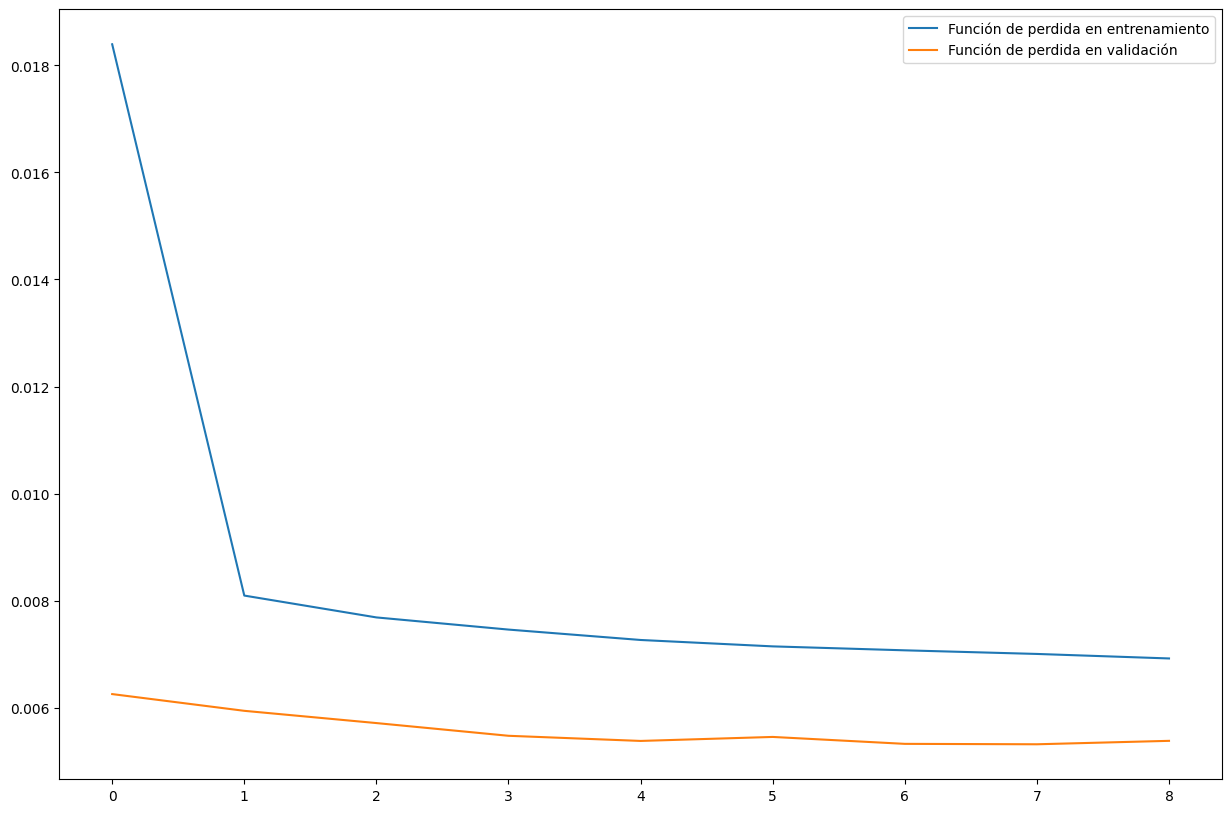

310/310 [==============================] - 1s 3ms/step


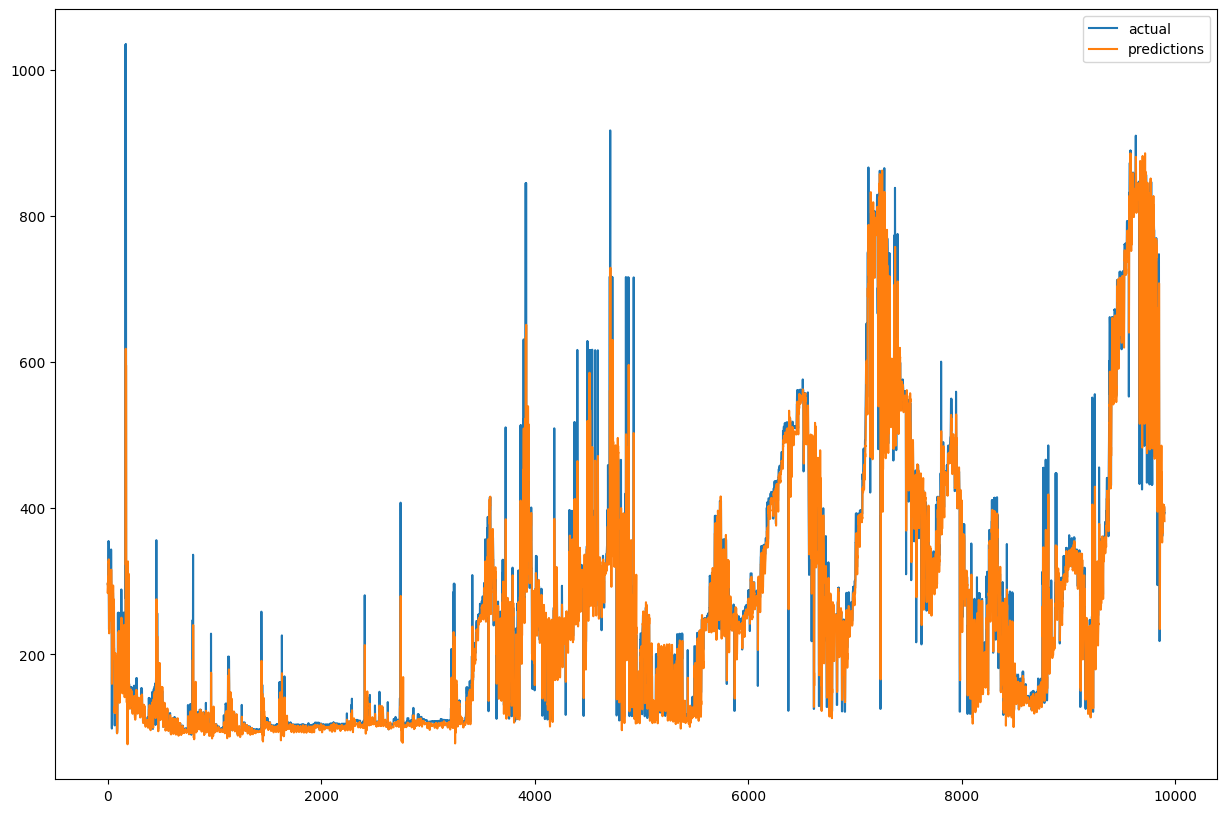

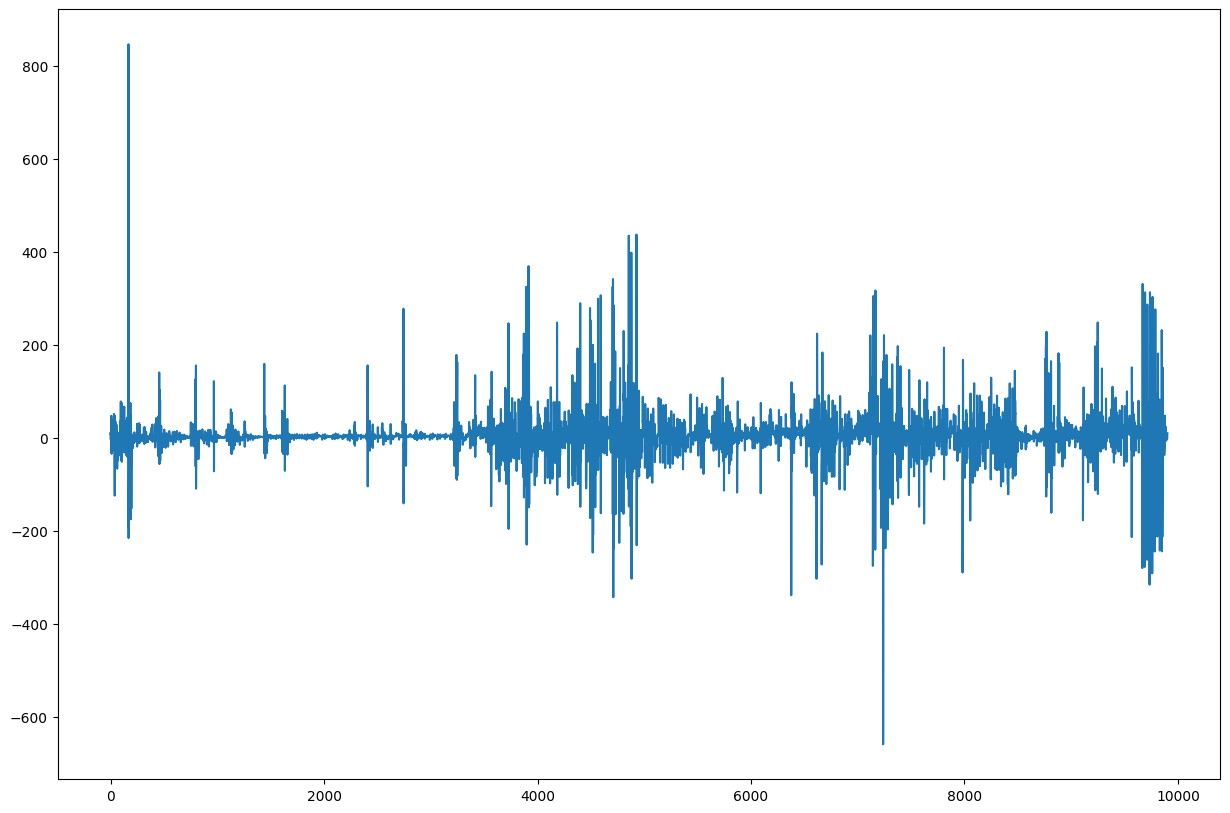

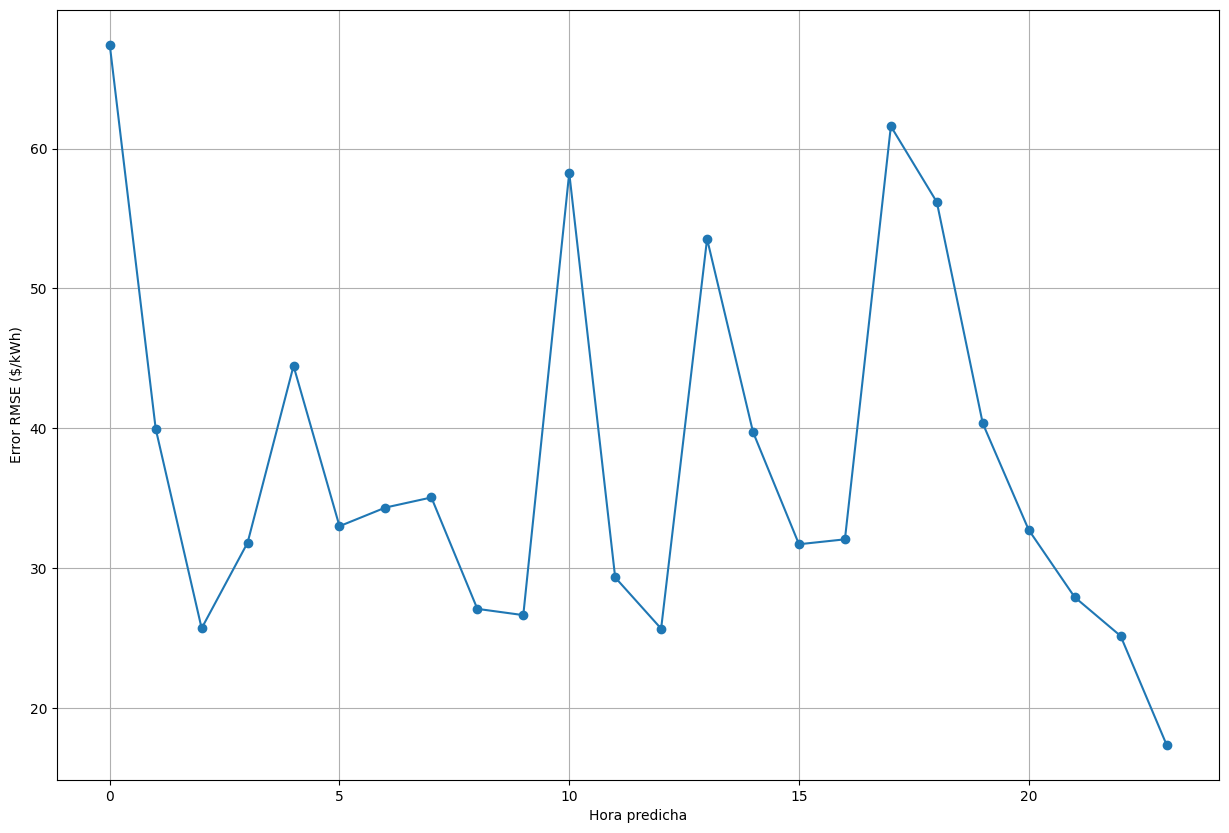

In [4]:
# Crear diferentes modelos base para cada tipo de particion
types = [(0.7,0.2,0.1),(0.8,0.1,0.1),(0.9,0.05,0.05)]
lista_results = []
INPUT_LENGTH = 24    # Registros de 24 horas consecutivas a la entrada
OUTPUT_LENGTH = 24   # El modelo va a predecir 24 horas a futuro
for i in types:
    scaler = MinMaxScaler()
    df = pd.read_csv('df_data_colum.csv', parse_dates=['date_hour'], index_col='date_hour')
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
    tr, vl, ts = train_test_vali(df_scaled['price'], i[0], i[1], i[2])

    x_tr, y_tr = to_sequences(OUTPUT_LENGTH, tr.values)
    x_vl, y_vl = to_sequences(OUTPUT_LENGTH, vl.values)
    x_ts, y_ts = to_sequences(OUTPUT_LENGTH, ts.values)

    input_shape = x_tr.shape[1:]

    model = build_model(
        input_shape,
        head_size=64,
        num_heads=1,
        ff_dim=1,
        num_transformer_blocks=1,
        mlp_units=[64],
        mlp_dropout=0,
        dropout=0,
    )

    model.compile(
        loss=root_mean_squared_error,
        optimizer=RMSprop(learning_rate=5e-5)
    )

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0002)
    start_time = time.time()
    historia = model.fit(
    x = x_tr,
    y = y_tr,
    batch_size = 256,
    epochs = 50,
    validation_data = (x_vl, y_vl),
    verbose=1, 
    callbacks=[early_stopping])
    training_time = elapsed_time(start_time)

    rmse_tr = model.evaluate(x_tr, y_tr, verbose=0)
    rmse_vl = model.evaluate(x_vl, y_vl, verbose=0)
    rmse_ts = model.evaluate(x_ts, y_ts, verbose=0)

    # Grafico de entrenamiento
    df_history = pd.DataFrame(historia.history)
    x = df_history.index
    plt.figure(figsize=(15, 10))
    plt.plot(x, df_history['loss'], label='Función de perdida en entrenamiento')
    plt.plot(x, df_history['val_loss'], label='Función de perdida en validación')
    plt.legend()
    plt.show()

    start_time = time.time()
    y_ts_pred = model.predict(x_ts)
    prediction_time = elapsed_time(start_time)
    test = pd.DataFrame(data = {'predictions':y_ts_pred.reshape(-1), 'actual':y_ts}, index=ts[24:].index)
    df_result = pd.DataFrame(scaler.inverse_transform(test), columns=test.columns)

    # Grafico de predicciones
    x = df_result.index
    plt.figure(figsize=(15, 10))
    plt.plot(x, df_result['actual'], label='actual')
    plt.plot(x, df_result['predictions'], label='predictions')
    plt.legend()
    plt.show()

    # Grafico de error 
    df_result['error'] = df_result['actual'] - df_result['predictions']
    plt.figure(figsize=(15, 10))
    plt.plot(df_result['error'])
    plt.show()

    # Grafico de RMSE por hora
    df_result.index = test.index
    df_result['hora'] = df_result.index.hour
    rmse_por_hora = []
    for hora in range(24):
        df_hora = df_result[df_result['hora'] == hora]
        rmse = np.sqrt(mean_squared_error(df_hora['actual'], df_hora['predictions']))
        rmse_por_hora.append(rmse)

    rmse_df = pd.DataFrame(rmse_por_hora, columns=['rmse_por_hora'], index=range(len(rmse_por_hora)))
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.plot(rmse_df['rmse_por_hora'], marker='o')
    ax.set_xlabel('Hora predicha')
    ax.set_ylabel('Error RMSE ($/kWh)')
    plt.grid()
    plt.show()

    # Guardar el modelo
    model.save('enconder_model/bases_model/model_{train_size}.h5'.format(train_size=i[0]))

    mean_MAE = MAE(p_pred= df_result['predictions'], p_real=df_result['actual'])
    mean_RMSE = RMSE(p_pred= df_result['predictions'], p_real=df_result['actual'])
    mean_MAPE = MAPE(p_pred= df_result['predictions'], p_real=df_result['actual']) * 100
    r2 = metrics.r2_score(df_result['actual'], df_result['predictions'])

    results = {'trainig_size': i[0], 'model': 'transformer', 'type': 'base', 'training_time': training_time, 
               'prediction_time': prediction_time, 'rmse_trainig': rmse_tr, 'rmse_validation': rmse_vl, 'rmse_test': rmse_ts, 
               'mean_MAE': mean_MAE,  'r2': r2, 'mean_RMSE': mean_RMSE, 'mean_MAPE': mean_MAPE}
    
    lista_results.append(results)

df_results_bases = pd.DataFrame(lista_results)
df_results_bases.to_csv('enconder_model/bases_model/df_results_bases.csv')